<a href="https://colab.research.google.com/github/ManditjyotiBorah/Shot-Boundary-Detection-using-DL/blob/main/fyp_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install xmltodict torchmetrics pytorch_metric_learning

In [ ]:
tv2001_video_root = "/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data"
tv2007_video_root = "/content/drive/MyDrive/Datasets/Videos/TRECVID 2007"
tv2001_annot_root = "/content/drive/My Drive/Datasets/Annotations/sbref01"
tv2007_annot_root = "/content/drive/MyDrive/Datasets/Annotations/masterShotRef_train"

In [ ]:
 import cv2
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from skimage.feature import hog
import os
# import xmltodict
import random
from PIL import Image
import json
from json import JSONEncoder

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
def readXML(path):
  annotations = []
  with open(path, 'r', encoding='utf-8') as file:
    my_xml = file.read()
    my_dict = xmltodict.parse(my_xml)
    for ele in my_dict['refSeg']['trans']:
      if(ele['@type'] == 'CUT'):
        annot1 = (int)(ele['@preFNum'])-37
        annot2 = (int)(ele['@postFNum'])-37
        annotations.append([annot1, annot2])
  annotations = sorted(annotations)
  return annotations

In [ ]:
def readMSB(path, offset=0):
  annotations = []
  with open(path, 'r', encoding='utf-8') as file:
    content = file.read()
    lines = content.split('\n')[2:]
    lines = lines[:-1]
    for i in range(1, len(lines)):
      if offset > 0:
        offset -= 1
        continue
      annotations.append(((int)(lines[i-1].split(' ')[1]), (int)(lines[i].split(' ')[0])))
  return annotations

In [ ]:
def readImg(cap):
  ret,frame = cap.read()
  frame = cv2.resize(frame, (224, 224), fx = 0, fy = 0, interpolation = cv2.INTER_CUBIC)
  img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  return img

In [ ]:
def readVideo(path, frameDict):
  jsonArr=[]
  cap = cv2.VideoCapture(path)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  print(frameCount)
  i=0
  while(cap.isOpened() and i<frameCount):
    try:
      img1 = readImg(cap)
      j = i
      i += 1
      
      if j in frameDict.keys():
        img2=readImg(cap)
        img1= json.dumps(img1.tolist())
        img2 = json.dumps(img2.tolist())
        data = {"image1":img1,"image2":img2,"target": frameDict[j]}
        
        jsonArr.append(data)
        i+=1
    except:
      print('Error in frame: ', i)
      i += 1
  cap.release()
  return jsonArr

In [ ]:
def prepareDataset(video_path , annot_path, offset=0, skip=0):
    data_count = 0
    prevFrame = 0
    requiredFrames = {}
    dataset = []
    if(os.path.dirname(video_path)[-1] == "a"):
        annotations = readXML(annot_path)
    else:
        annotations = readMSB(annot_path, skip)
                
    for annot in annotations:
      annot0 = annot[0] + offset
      annot1 = annot[1] + offset
      requiredFrames[random.randint(prevFrame, annot0)] = 1.0
      prevFrame = annot1 + 1
      requiredFrames[annot0] = 0.0
    print(requiredFrames)
    json_path = "/content/drive/My Drive/Datasets/JSONs/"+os.path.basename(video_path)+".json"
    jsonArr = readVideo(video_path, requiredFrames)

    lim = 10
    df = []
    for ele in jsonArr:
      df.append([np.asarray(json.loads(ele["image1"])), np.asarray(json.loads(ele["image2"])), ele["target"]])
      lim -= 1
      if lim == 0:
        break
    
    # plot(df, len(df))

    data_count+=len(requiredFrames)
    
    with open(json_path, 'w') as f:
      json.dump(jsonArr, f, indent=4, separators=(',',': '))
    
    print(f"{os.path.basename(video_path)} completed , total data = {data_count}")

In [ ]:
name = 'BG_15190'
skip = 0
offset = -2
prepareDataset(os.path.join(tv2007_video_root, name + '.mpg'), os.path.join(tv2007_annot_root, name + '.mpg.msb'), offset, skip)

{55: 1.0, 72: 0.0, 110: 1.0, 141: 0.0, 178: 1.0, 219: 0.0, 324: 1.0, 431: 0.0, 601: 1.0, 618: 0.0, 713: 1.0, 881: 0.0, 911: 1.0, 949: 0.0, 994: 1.0, 1014: 0.0, 1075: 1.0, 1079: 0.0, 1163: 1.0, 1238: 0.0, 1507: 1.0, 1804: 0.0, 1865: 1.0, 1977: 0.0, 2153: 1.0, 2197: 0.0, 2294: 1.0, 2335: 0.0, 2525: 1.0, 2534: 0.0, 2573: 1.0, 2682: 0.0, 2708: 1.0, 2932: 0.0, 3030: 1.0, 3035: 0.0, 3133: 1.0, 3471: 0.0, 3483: 1.0, 3679: 0.0, 3854: 1.0, 3855: 0.0, 3917: 1.0, 3928: 0.0, 4253: 1.0, 4452: 0.0, 4566: 1.0, 4660: 0.0, 5115: 1.0, 5121: 0.0, 5188: 1.0, 5260: 0.0, 5535: 1.0, 5686: 0.0, 5699: 1.0, 5885: 0.0, 5949: 1.0, 6025: 0.0, 6134: 1.0, 6421: 0.0, 6560: 1.0, 6600: 0.0, 7004: 1.0, 7076: 0.0, 7089: 1.0, 7180: 0.0, 7268: 1.0, 7693: 0.0, 7766: 1.0, 7854: 0.0, 7924: 1.0, 7934: 0.0, 7984: 1.0, 8042: 0.0, 8108: 1.0, 8173: 0.0, 8232: 1.0, 8270: 0.0, 8595: 1.0, 8654: 0.0, 8672: 1.0, 8750: 0.0, 8761: 1.0, 8826: 0.0, 8831: 1.0, 8897: 0.0, 9041: 1.0, 9149: 0.0, 9159: 1.0, 9233: 0.0, 9745: 1.0, 10257: 0.0, 102

END

In [ ]:
with open("/content/drive/My Drive/Datasets/JSONs/" + name + ".mpg.json") as fp:
  obj = json.load(fp)

In [ ]:
def plot(dataset, n):
  f, axarr = plt.subplots(n, 2, figsize=(10,n*5))
  for i in range(n):
    axarr[i][0].imshow(dataset[i][0])
    axarr[i][1].imshow(dataset[i][1])

In [ ]:
dataset = []
for i in range(len(obj)):
  img1 = np.asarray(json.loads(obj[i]["image1"]))
  img2 = np.asarray(json.loads(obj[i]["image2"]))
  target = obj[i]["target"]
  dataset.append([img1, img2, target])
  if i > 15:
    break

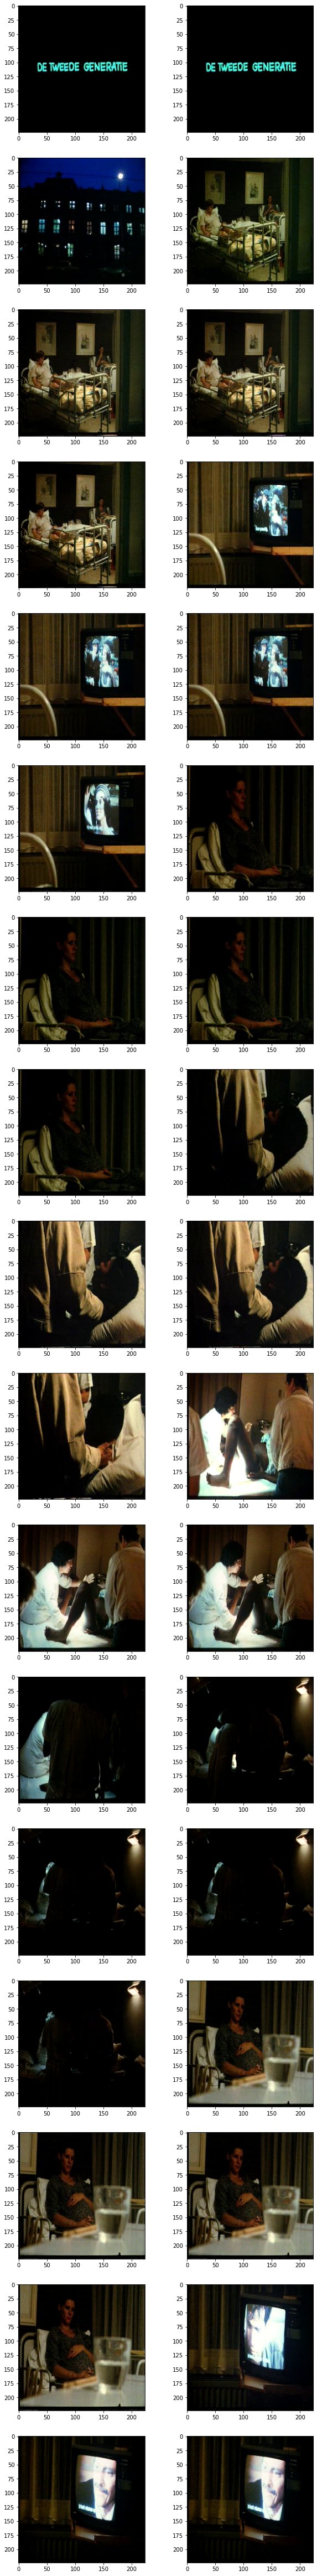

In [ ]:
plot(dataset, len(dataset))

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU')
else:
  device = torch.device('cpu')
  print('CPU')

CPU


In [ ]:


def trecvid_traverse(video_root, annot_root):
  Trecvid = []
  for root, dirs, files in os.walk(video_root, topdown=False):
    for name in files:
      if root==tv2007_video_root and os.path.exists(annot_root+"/"+name+".msb"):
        Trecvid.append((root+"/"+name, annot_root+"/"+name+".msb"))
      if root==tv2001_video_root and os.path.exists(annot_root+"/ref_"+os.path.splitext(name.lower())[0]+".xml"):
        Trecvid.append((root+"/"+name, annot_root+"/ref_"+os.path.splitext(name.lower())[0]+".xml"))
  return Trecvid

In [ ]:
tv01 = trecvid_traverse(tv2001_video_root,tv2001_annot_root)
for x,y in tv01:
  print(x,y)

/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data/BOR03.mpg /content/drive/My Drive/Datasets/Annotations/sbref01/ref_bor03.xml
/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data/BOR17.mpg /content/drive/My Drive/Datasets/Annotations/sbref01/ref_bor17.xml
/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data/anni005.mpg /content/drive/My Drive/Datasets/Annotations/sbref01/ref_anni005.xml
/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data/anni009.mpg /content/drive/My Drive/Datasets/Annotations/sbref01/ref_anni009.xml
/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data/NAD53.mpg /content/drive/My Drive/Datasets/Annotations/sbref01/ref_nad53.xml
/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data/NAD57.mpg /content/drive/My Drive/Datasets/Annotations/sbref01/ref_nad57.xml
/content/drive/My Drive/Datasets/Videos/Trecvid 2001 video data/senses111.mpg /content/drive/My Drive/Datasets/Annotations/sbref01/ref_senses111.x

In [ ]:
def get(path):
  cap = cv2.VideoCapture(path)
  frameCount = (int)(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  print(frameCount)
  i=0
  frames = []
  while(cap.isOpened() and i<frameCount):
    img = readImg(cap)
    frames.append(img)
    i+=1
  cap.release()
  return frames

def view(i,frames):
  plt.figure()
  plt.imshow(frames[i])
  plt.figure()
  plt.imshow(frames[i+1])

In [ ]:
f = get("/content/sample_data/temp/Trecvid 2001 video data/anni009.mpg")

48449


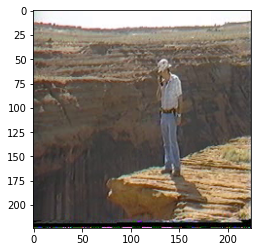

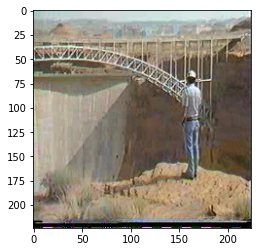

In [ ]:
view(164,f)

In [ ]:
img1 = json.dumps(numpy.array([[11, 22, 33], [44, 55, 66], [77, 88, 99]]).tolist())
img2 = json.dumps(numpy.array([[32, 11,34 ],[45,55,66],[56,67,78]]).tolist())
target = 1.0
jsonArray= []

data = {"image1":img1,"image2":img2,"target": 1}
jsonArray.append(data)

data = {"image1":img1,"image2":img2,"target": 1}
jsonArray.append(data)

with open("/content/drive/MyDrive/Datasets/JSONs/anni005.mpg.json", mode='w') as f:
  json.dump(jsonArray, f,indent=4, separators=(',',': '))

In [ ]:
count=0
for files in os.listdir("/content/drive/MyDrive/Datasets/JSONs"):
  with open("/content/drive/MyDrive/Datasets/JSONs/"+files) as fp:
    obj = json.load(fp)
    count+=len(obj)
print(count)

2381


In [ ]:
jsonData=[]
i=0
for files in os.listdir("/content/drive/MyDrive/Datasets/JSONs"):
  with open("/content/drive/MyDrive/Datasets/JSONs/"+files) as fp:
    obj = json.load(fp)
    jsonData=jsonData+obj
    i+=1
  if i==2:
    break

In [ ]:
with open("/content/drive/My Drive/Datasets/test.json", 'w') as f:
  json.dump(jsonData, f, indent=4, separators=(',',': '))

In [ ]:
obj=None
with open("/content/drive/My Drive/Datasets/df.json") as fp:
    obj = json.load(fp)

In [ ]:
print(len(obj))

2381


In [ ]:
import pandas as pd 
df = pd.read_json("/content/drive/My Drive/Datasets/df.json")

In [ ]:
df.to_csv("/content/drive/My Drive/Datasets/df.csv")

In [ ]:
decodedArrays = json.loads(listObj[0]['image1'])
finalNumpyArray = numpy.asarray(decodedArrays)
print("NumPy Array")
print(finalNumpyArray)

In [ ]:
print(listObj[0]['image1'])